<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-05-31 01:50:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  33.3MB/s    in 1.1s    

2024-05-31 01:50:38 (33.3 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [5]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [6]:
import pandas as pd

## Demo: How to run an sql query


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [7]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [10]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
# pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [39]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
df= pd.read_sql_query(QUERY,conn)

import matplotlib as plt
# df['ConvertedComp'].plot(kind='hist')


### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

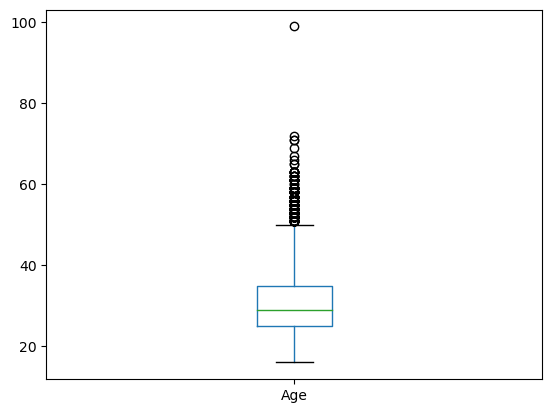

In [56]:
# your code goes here

QUERY = """
SELECT Age
FROM master
"""
df= pd.read_sql_query(QUERY,conn)
df.boxplot(column=['Age'], grid=False)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

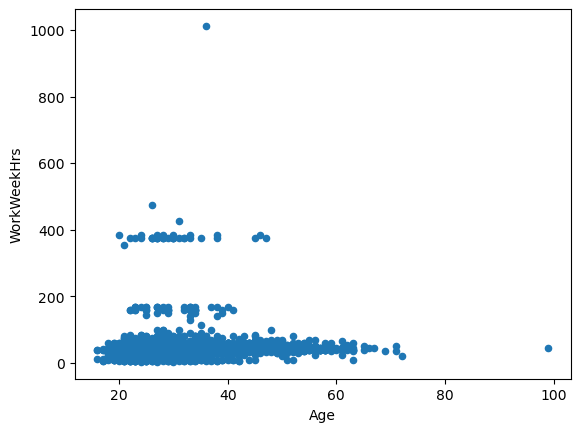

In [57]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df= pd.read_sql_query(QUERY,conn)
df.plot.scatter(x='Age', y= 'WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


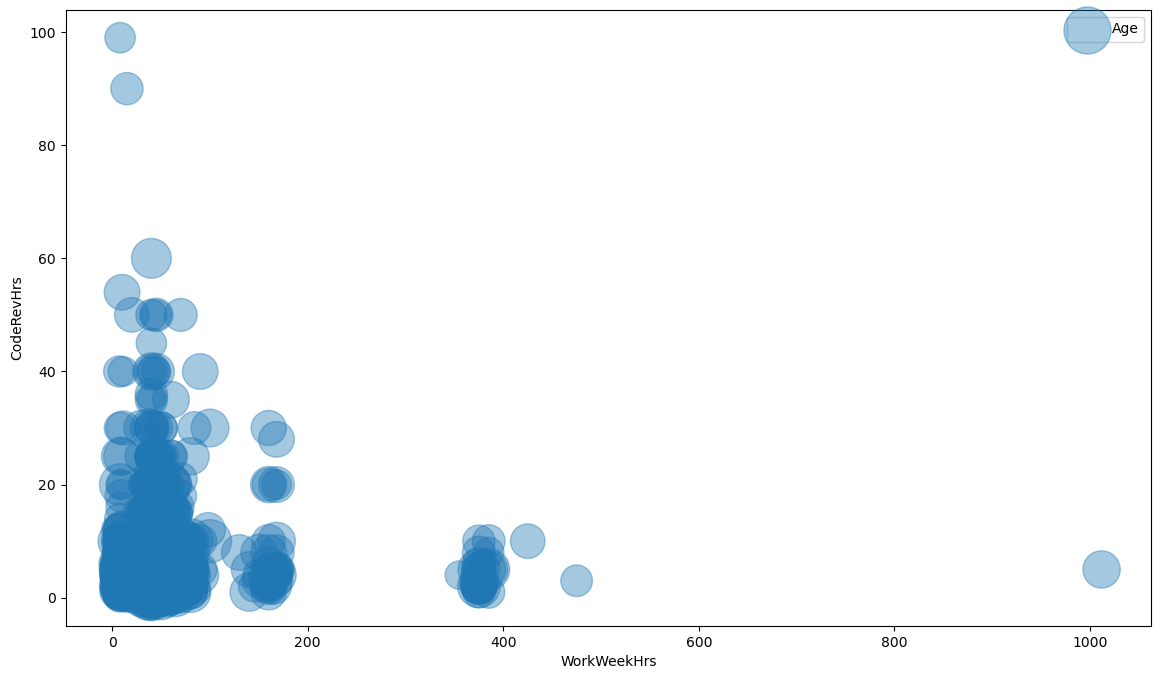

In [107]:
# your code goes here
import matplotlib.pyplot as plt
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df= pd.read_sql_query(QUERY,conn)
df
df.plot(kind='scatter',x='WorkWeekHrs', y= 'CodeRevHrs', s=df['Age']*20, alpha=0.4, figsize=(14,8))
plt.legend(['Age'], loc='upper right')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


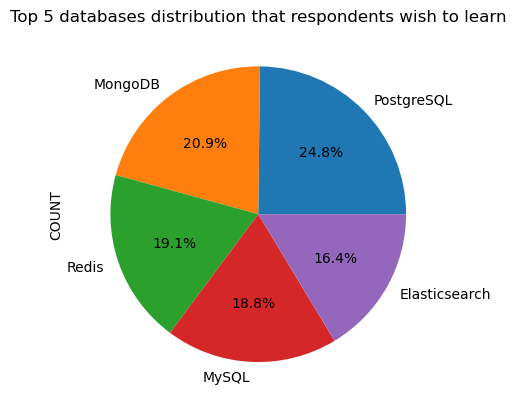

In [82]:
# your code goes here
import matplotlib.pyplot as plt
# Your SQL query
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS COUNT
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT DESC
LIMIT 5
"""


# Execute the SQL query and read it into a DataFrame
df = pd.read_sql_query(QUERY, conn)
df
df['COUNT'].plot(kind='pie', labels= ['PostgreSQL', 'MongoDB', 'Redis', 'MySQL', 'Elasticsearch'], autopct='%1.1f%%')
plt.title('Top 5 databases distribution that respondents wish to learn')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


NameError: name 'plt' is not defined

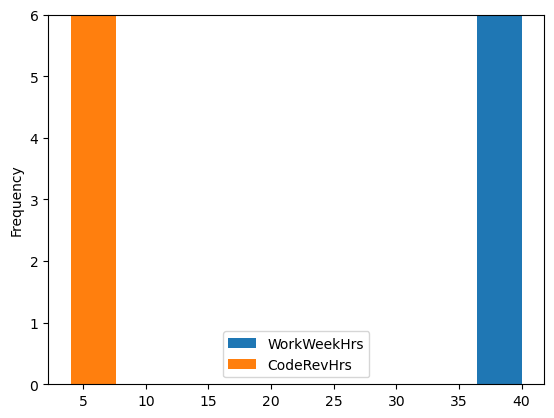

In [31]:
# your code goes here

QUERY = """
SELECT WorkWeekHrs,CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df= pd.read_sql_query(QUERY,conn)

df = df.groupby(['Age']).median()
df
df.plot(kind='hist', stacked=True)
plt.ylim([0,8])

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

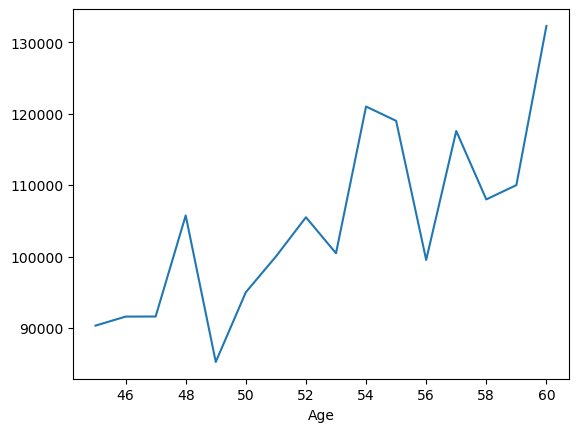

In [28]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df= pd.read_sql_query(QUERY,conn)
df= df.groupby('Age')['ConvertedComp'].median()
df
df.plot(kind='line')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:ylabel='MainBranch'>

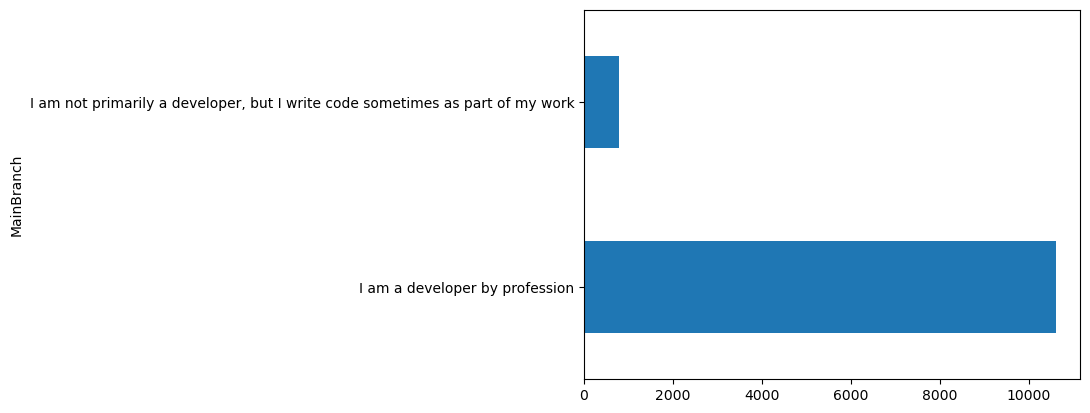

In [18]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df= pd.read_sql_query(QUERY,conn)
df1=df.value_counts()
df= df.groupby('MainBranch')['MainBranch'].count()

df.plot(kind='barh')

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
